<h1>POI Ćwiczenie 4<h1>

# Importowanie bibliotek

In [23]:
import numpy as np
from keras import Sequential
from keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Wczytywanie danych z pliku csv

In [24]:
def load_data(feature_csv):
    """
    Load data from a CSV file.
    Args:
        feature_csv (str): Path to the CSV file containing features and labels.
    Returns:
        X (np.ndarray): Feature matrix.
        y (np.ndarray): Labels.
    """
    data = pd.read_csv(feature_csv)
    X = data.drop('category', axis=1).values
    y = data['category'].values
    return X, y

X, y = load_data('texture_features.csv')

# Wstępne przetwarzanie danych


In [25]:
label_encoder = LabelEncoder()
y_int = label_encoder.fit_transform(y)
onehot_encoder = OneHotEncoder(sparse_output=False)
y_onehot = onehot_encoder.fit_transform(y_int.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(
    X, y_onehot, test_size=0.3, random_state=42, stratify=y_int
)

# Tworzenie modelu oraz trenowanie sieci neuronowej

In [34]:
model = Sequential()
model.add(Dense(10, activation='sigmoid', input_dim = X.shape[1]))
model.add(Dense(3, activation='softmax'))
model.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)
model.fit(X_train, y_train, epochs=100, batch_size=10, shuffle=True)

Epoch 1/100
38/38 [==============================] - 0s 757us/step - loss: 1.0291 - accuracy: 0.4709
Epoch 2/100
38/38 [==============================] - 0s 826us/step - loss: 0.9466 - accuracy: 0.7354
Epoch 3/100
38/38 [==============================] - 0s 839us/step - loss: 0.8978 - accuracy: 0.7381
Epoch 4/100
38/38 [==============================] - 0s 854us/step - loss: 0.8559 - accuracy: 0.7381
Epoch 5/100
38/38 [==============================] - 0s 854us/step - loss: 0.8179 - accuracy: 0.7381
Epoch 6/100
38/38 [==============================] - 0s 770us/step - loss: 0.7900 - accuracy: 0.7381
Epoch 7/100
38/38 [==============================] - 0s 1ms/step - loss: 0.7555 - accuracy: 0.7381
Epoch 8/100
38/38 [==============================] - 0s 935us/step - loss: 0.7233 - accuracy: 0.7381
Epoch 9/100
38/38 [==============================] - 0s 964us/step - loss: 0.6940 - accuracy: 0.7381
Epoch 10/100
38/38 [==============================] - 0s 964us/step - loss: 0.6665 - accuracy

# Testowanie sieci

6/6 [==============================] - 0s 818us/step


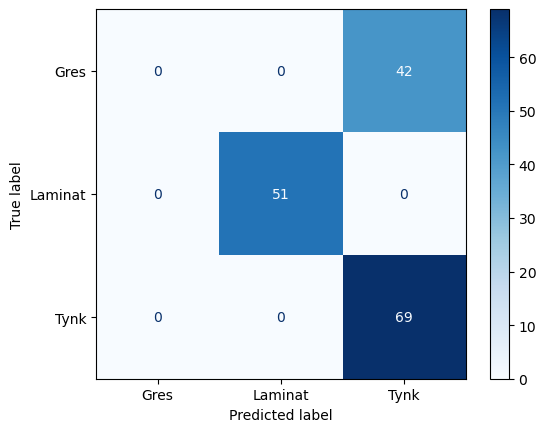

In [35]:
y_pred = model.predict(X_test)
y_pred_int = np.argmax(y_pred, axis=1)
y_test_int = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_int, y_pred_int)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')


# Confusion matrix wygenerowany przez google colab
Epochs = 25, batch_size = 10


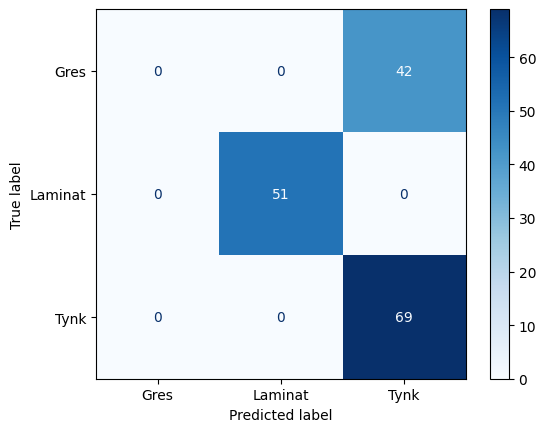

Róznica między dwoma matrixami przy takich samych ustawieniach siecii wynikała ze środowiska w którym model był uczony. Trenowanie na GPU jest znacznie szybsze niż trenowanie na CPU. Dodatkowo GPU jest bardziej wydaje przy dużych modelach danych. Przy zastosowaniu tej samej ilości etapów (Epochs) model trenowany na GPU wykazał znaczne przetrenowanie modelu co skutkowało sklasyfikowaniem wszystkiego jako Tynku. Zredukowanie liczby etapów do 25 pozwoliło uzyskać wynik zbliżony do tego trenowanego na CPU przy 100 Epochach. Pomimo faktu, że tablica pomyłek w obu przypadkach wygląda identycznie, modele nieznacznie różnią się skutecznością oraz funkcją straty.